In [4]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import random
import time
import json
from collections import Counter

from scripts import utils
from scripts import documents as docs
from scripts import comparisons 
from scripts import comparisonsmachine as machine

data_folder = "data"

# article_df = pd.read_pickle(os.path.join(data_folder, "article_df_20190601"))
article_df = pd.read_pickle(os.path.join(data_folder, "article_df_20180715"))
#article_df = article_df.reset_index(drop = True)
# article_df["nchar"] = [len(article_df["text"][i]) for i in range(len(article_df))]

event_names = np.unique(article_df["event"].dropna())

# events = [event for event in np.unique(article_df["event"]) if not np.isnan(event)]
event_path = os.path.join(data_folder, "eventDict2019-06-01.json")
with open(event_path, encoding = "utf8") as json_file:
    events = json.load(json_file)
print("events ", events.keys())

para_sep = "###"
parser = "spacy"
dd = comparisons.DuplicationDetection()
cm = machine.MultiComparisons()
cm.para_sep = para_sep

display(article_df.head(3))

events  dict_keys(['singletons', 'incompleteFingerprints', 'algoGroups', 'events', 'wordDict', 'entityDict'])


,id,publisher,scrape_time,on_homepage,url,title,text,fingerprint,event,doc,paywall
0,0,wsbtv.com,2018-07-16T01:02:26-04:00,True,https://www.wsbtv.com/news/local/cobb-county/p...,"Police: Missing teen with autism found, reunit...","Police: Missing teen with autism found, reunit...","{'wordCounts': {'1533': 10, '367': 3, '2619': ...",NaN,None,0.0
1,1,wn.com,2018-07-16T04:51:37-04:00,False,https://wn.com/Apostolic_Constitutions,Apostolic s,Apostolic Constitutions ### back to playlist #...,"{'wordCounts': {'147633': 5, '5029': 6, '546':...",NaN,None,0.0
2,2,lufkindailynews.com,2018-07-15T22:48:17-04:00,False,http://lufkindailynews.com/news/sports/article...,No refuge from politics but France victory a f...,No refuge from politics but France victory a f...,"{'wordCounts': {'2782': 6, '534': 7, '5473': 1...",0.0,None,0.0


In [5]:
events = [event for event in np.unique(article_df["event"]) if not np.isnan(event)]
n = [len(article_df.loc[article_df["event"] == event]) for event in events]
print("Event sizes: ", n)

Event sizes:  [4551, 1215, 1096, 2033, 625, 616, 810, 567, 655, 386, 884, 864, 722, 657, 495, 584, 664, 419, 393, 591, 359, 386, 325, 438, 289, 613, 792, 295, 372, 312, 314, 231, 317, 195, 220, 366, 374, 250, 312, 49884, 175, 285, 237, 1161, 553, 185, 191, 164, 182, 166]


In [17]:
results_df = pd.DataFrame(columns = ["event", "n", "n_valid"] + [f"unique{thresh}" for thresh in range(10, 100, 5)])
results_df

,event,n,n_valid,unique10,unique15,unique20,unique25,unique30,unique35,unique40,...,unique50,unique55,unique60,unique65,unique70,unique75,unique80,unique85,unique90,unique95


In [21]:
try:
    results_df = pd.read_csv(os.path.join(results_folder, "results_" + date + "_clusters_temp.csv"))
except:
    results_df = pd.DataFrame(columns = ["event", "n", "n_valid"] + [f"unique{thresh}" for thresh in range(10, 100, 5)])
    results_df["event"] = events
    results_df["n"] = n
results_df

,event,n,n_valid,unique10,unique15,unique20,unique25,unique30,unique35,unique40,...,unique50,unique55,unique60,unique65,unique70,unique75,unique80,unique85,unique90,unique95
0,0.0,4551,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,1215,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.0,1096,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.0,2033,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.0,625,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5.0,616,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,6.0,810,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,7.0,567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,8.0,655,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,9.0,386,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
i = len(events) - 2
sample = np.array(article_df.loc[article_df["event"] == events[i], "id"])
len(sample)

182

In [37]:
article_dict = cm.dict_by_ids(article_df, sample, para_sep, "spacy")

Loaded documents via multiprocessing, 0.16m elapsed


In [39]:
article_df.loc[sample, "invalid"] = [article_df.loc[article_df["id"] == i, "doc"].iloc[0].invalid for i in sample]

In [42]:
valid_inds = [i for i in sample if article_df.loc[i, "invalid"] == 0]

In [44]:
article_dict_valid = {k: article_dict[k] for k in valid_inds}

In [45]:
sim_mat = cm.run(article_dict_valid)

0 of 15225 comparisons made, 0.00m elapsed
10000 of 15225 comparisons made, 0.73m elapsed
Finished document comparisons via multiprocessing, 1.16m elapsed


In [46]:
dd.cluster_articles(sim_mat)

array([[0.00000000e+00, 1.71000000e+02, 0.00000000e+00, 2.00000000e+00],
       [1.30000000e+01, 1.75000000e+02, 0.00000000e+00, 3.00000000e+00],
       [1.60000000e+01, 1.76000000e+02, 0.00000000e+00, 4.00000000e+00],
       [2.50000000e+01, 1.77000000e+02, 0.00000000e+00, 5.00000000e+00],
       [3.40000000e+01, 1.78000000e+02, 0.00000000e+00, 6.00000000e+00],
       [3.80000000e+01, 1.79000000e+02, 0.00000000e+00, 7.00000000e+00],
       [8.90000000e+01, 1.80000000e+02, 0.00000000e+00, 8.00000000e+00],
       [1.02000000e+02, 1.81000000e+02, 0.00000000e+00, 9.00000000e+00],
       [1.40000000e+02, 1.82000000e+02, 0.00000000e+00, 1.00000000e+01],
       [1.56000000e+02, 1.83000000e+02, 0.00000000e+00, 1.10000000e+01],
       [1.10000000e+01, 1.15000000e+02, 0.00000000e+00, 2.00000000e+00],
       [2.30000000e+01, 1.85000000e+02, 0.00000000e+00, 3.00000000e+00],
       [6.10000000e+01, 1.86000000e+02, 0.00000000e+00, 4.00000000e+00],
       [9.10000000e+01, 1.87000000e+02, 0.00000000e

In [49]:
for thresh in range(10, 100, 5):
    results_df.loc[i, f"unique{thresh}"] = dd.prop_unique_clusters(thresh_same_doc = thresh)

results_df.loc[i, "n_valid"] = len(valid_inds)

In [50]:
results_df

,event,n,n_valid,unique10,unique15,unique20,unique25,unique30,unique35,unique40,...,unique50,unique55,unique60,unique65,unique70,unique75,unique80,unique85,unique90,unique95
0,0.0,4551,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,1215,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.0,1096,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.0,2033,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.0,625,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5.0,616,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,6.0,810,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,7.0,567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,8.0,655,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,9.0,386,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


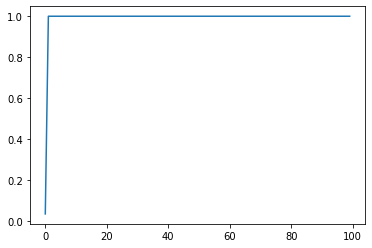

In [52]:
plt.plot([dd.prop_unique_clusters(thresh_same_doc = thresh) for thresh in range(0, 100)])

In [76]:
sample = random.sample(list(article_df.loc[np.isnan(article_df["event"]), "id"]), 10000)

In [77]:
article_dict = cm.dict_by_ids(article_df, sample, para_sep, parser)

Loaded documents via multiprocessing, 6.48m elapsed


In [78]:
article_df.loc[sample, "invalid"] = [article_df.loc[article_df["id"] == i, "doc"].iloc[0].invalid for i in sample]
valid_inds = [i for i in sample if article_df.loc[i, "invalid"] == 0]
article_dict_valid = {k: article_dict[k] for k in valid_inds}
len(valid_inds)

5279

In [ ]:
sim_mat = cm.run(article_dict_valid)
dd.cluster_articles(sim_mat)
for thresh in range(10, 100, 5):
    results_df.loc[len(events), f"unique{thresh}"] = dd.prop_unique_clusters(thresh_same_doc = thresh)

0 of 13931281 comparisons made, 0.19m elapsed
10000 of 13931281 comparisons made, 0.30m elapsed
20000 of 13931281 comparisons made, 0.39m elapsed
30000 of 13931281 comparisons made, 0.52m elapsed
40000 of 13931281 comparisons made, 0.84m elapsed
50000 of 13931281 comparisons made, 1.27m elapsed
60000 of 13931281 comparisons made, 1.53m elapsed
70000 of 13931281 comparisons made, 1.82m elapsed
80000 of 13931281 comparisons made, 2.04m elapsed
90000 of 13931281 comparisons made, 2.13m elapsed
100000 of 13931281 comparisons made, 2.67m elapsed
110000 of 13931281 comparisons made, 2.90m elapsed
120000 of 13931281 comparisons made, 3.04m elapsed
130000 of 13931281 comparisons made, 3.16m elapsed
140000 of 13931281 comparisons made, 3.32m elapsed
150000 of 13931281 comparisons made, 5.85m elapsed
160000 of 13931281 comparisons made, 5.98m elapsed
170000 of 13931281 comparisons made, 6.12m elapsed
180000 of 13931281 comparisons made, 6.26m elapsed
190000 of 13931281 comparisons made, 6.41m el

In [ ]:
results_df